### Introduction

The goal is to build a prediction model that classify if a loan will be paid back in full or otherwise. It will be used to assess the credit risk of an individual. If the risk is high, output will be loan will be paid in full, hence loan can be given out to the individual. If otherwise, loan cannot be given to the customer.
. <br> <br>
The dataset used in training the model was obtained from Kaggle and the link to the dataset can be found [here]. The dataset is labelled, hence series of classification models were experimented during the task. <br> <br>
The classification models used are **Logistic Regression, Decision Tree, Random Forest, Support Vector Machine and Gaussian Naive Bayes** 

### Flow of Work

- **Understanding the Dataset** <br>
  I import the dataset and try to understand its fundamentals using the **pandas library**. Things I look out for are rows, columns, the data type of each column, null values.
- **Data Exploration via Visualisation** <br>
  I look out for the spread of the dataset and the outliers to determine the prepreocessing required using **boxplot**. I also checked the correlation between all variables using the heatmap plot of **correlation analysis**
- **Data Preprocessing** <br>
  I preprocesses the data by encoding the categorical columns using **label encoder** and handled the outliers using **standard scaler**
- **Our Models** <br>
  I built the 5 models using the **Logistic Regression, Decision Tree, Random Forest, Support Vector Machine and Gaussian Naive Bayes**  from the **scikit-learn** library.
- **Inference** <br>
  I explained the performance of the model across the classes using precision and recall.
- **Best Model** <br>
  I visualised the best performing model on a **confusion matrix**

In [1]:
#Import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#Import the dataset

data = pd.read_csv('loan_data.csv')

### Understanding the Dataset

In [3]:
#View the first 5 rows of the dataset

data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#Display the shape of the dataset

data.shape

(9578, 14)

In [5]:
#Display the summary statistics

data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
#Display the data types of all variables in the dataset

data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [7]:
#Display the group in "Purpose"

data['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [8]:
#Check for missing values

data.apply(lambda x: sum(x.isnull()), axis = 0)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

No null value found

### About the Dataset
The variables in the dataset are characteristics of loan, some of these variables are credit policy, loan purpose, interest rate, annual income etc.<br> <br>
There are 13 columns and 9,578 rows. All the columns are numeric except the column 'purpose'. Purpose has 7 groups of which 'debt_consolidation' occurred most while 'educational'. None of the variables has empty cells.

### Data Exploration via Visualization

**1. Correlation Analysis**

/Users/user/opt/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

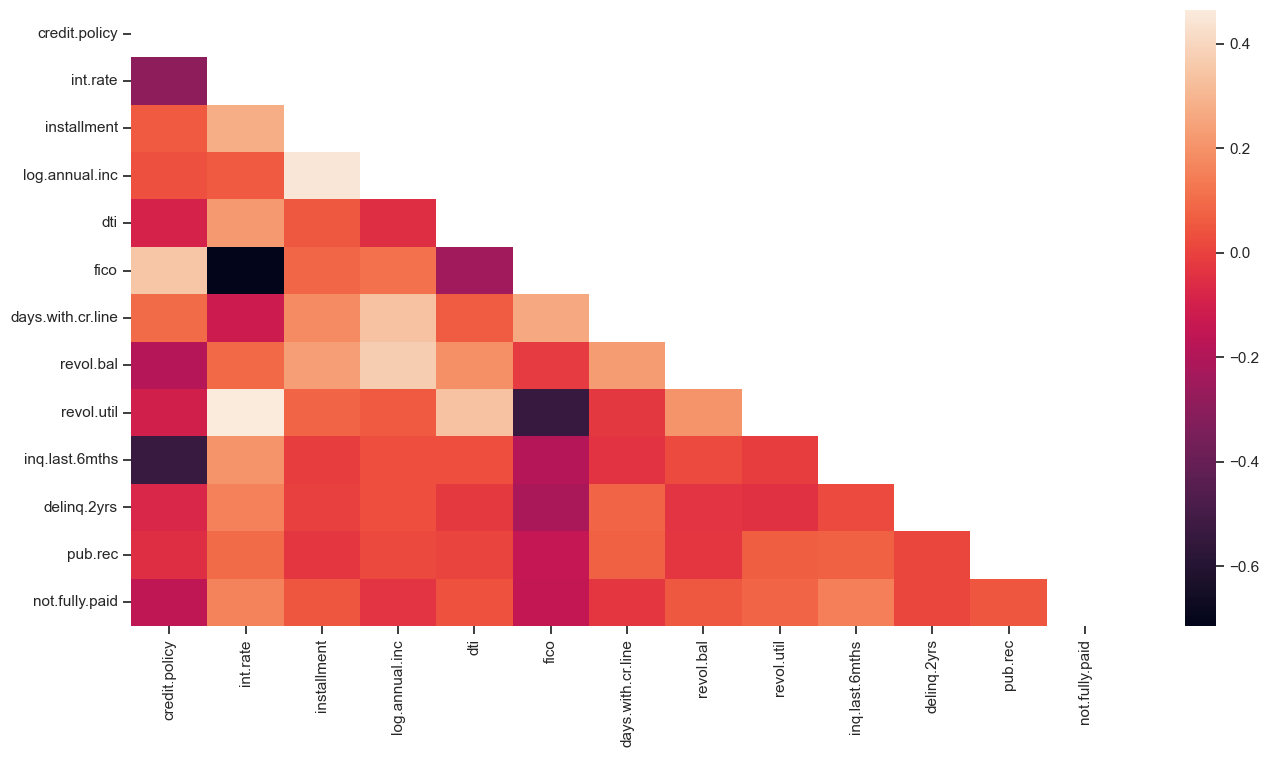

In [9]:
#Correlation matrix for all numeric features

corr_data = data.select_dtypes(include=['int64','float64'])

# Compute the correlation matrix
corr = corr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,  mask=mask)

There is high negative correlation between - fico & revol.util, fico & int.rate, inq.last.6mnths & credit.policy. The highest positive correlation is about 0.4, the highest positve correlation is between revol.util & int.rate

**2. Check for Outliers - Histogram & Boxplots**

In [10]:
#Break the features into groups based on type for visualization 

x = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

numeric_features = x.select_dtypes(include=['int64','float64'])
integer_features = x.select_dtypes(include='int64')
float_features = x.select_dtypes(include='float64')
categorical_features = x.select_dtypes(include='object')

numeric_columns = data.select_dtypes(include=['int64','float64'])

#Group-plotting of Distribution(Histogram) & Boxplot for numeric features

fig = plt.figure(constrained_layout=True, figsize=(15,20))

subfigs = fig.subfigures(6,2)

for subfig, col in zip(subfigs.flat, numeric_features.columns):
    (ax_box, ax_hist) = subfig.subplots(2,1, sharex=True, gridspec_kw={"height_ratios": (0.15,0.85)})
    sns.boxplot(data=numeric_features, x=col, ax=ax_box)
    sns.histplot(data=numeric_features, x=col, ax=ax_hist)
    ax_box.set(xlabel="")
    ax_hist.set_xlabel(col, fontsize=15)

plt.show()

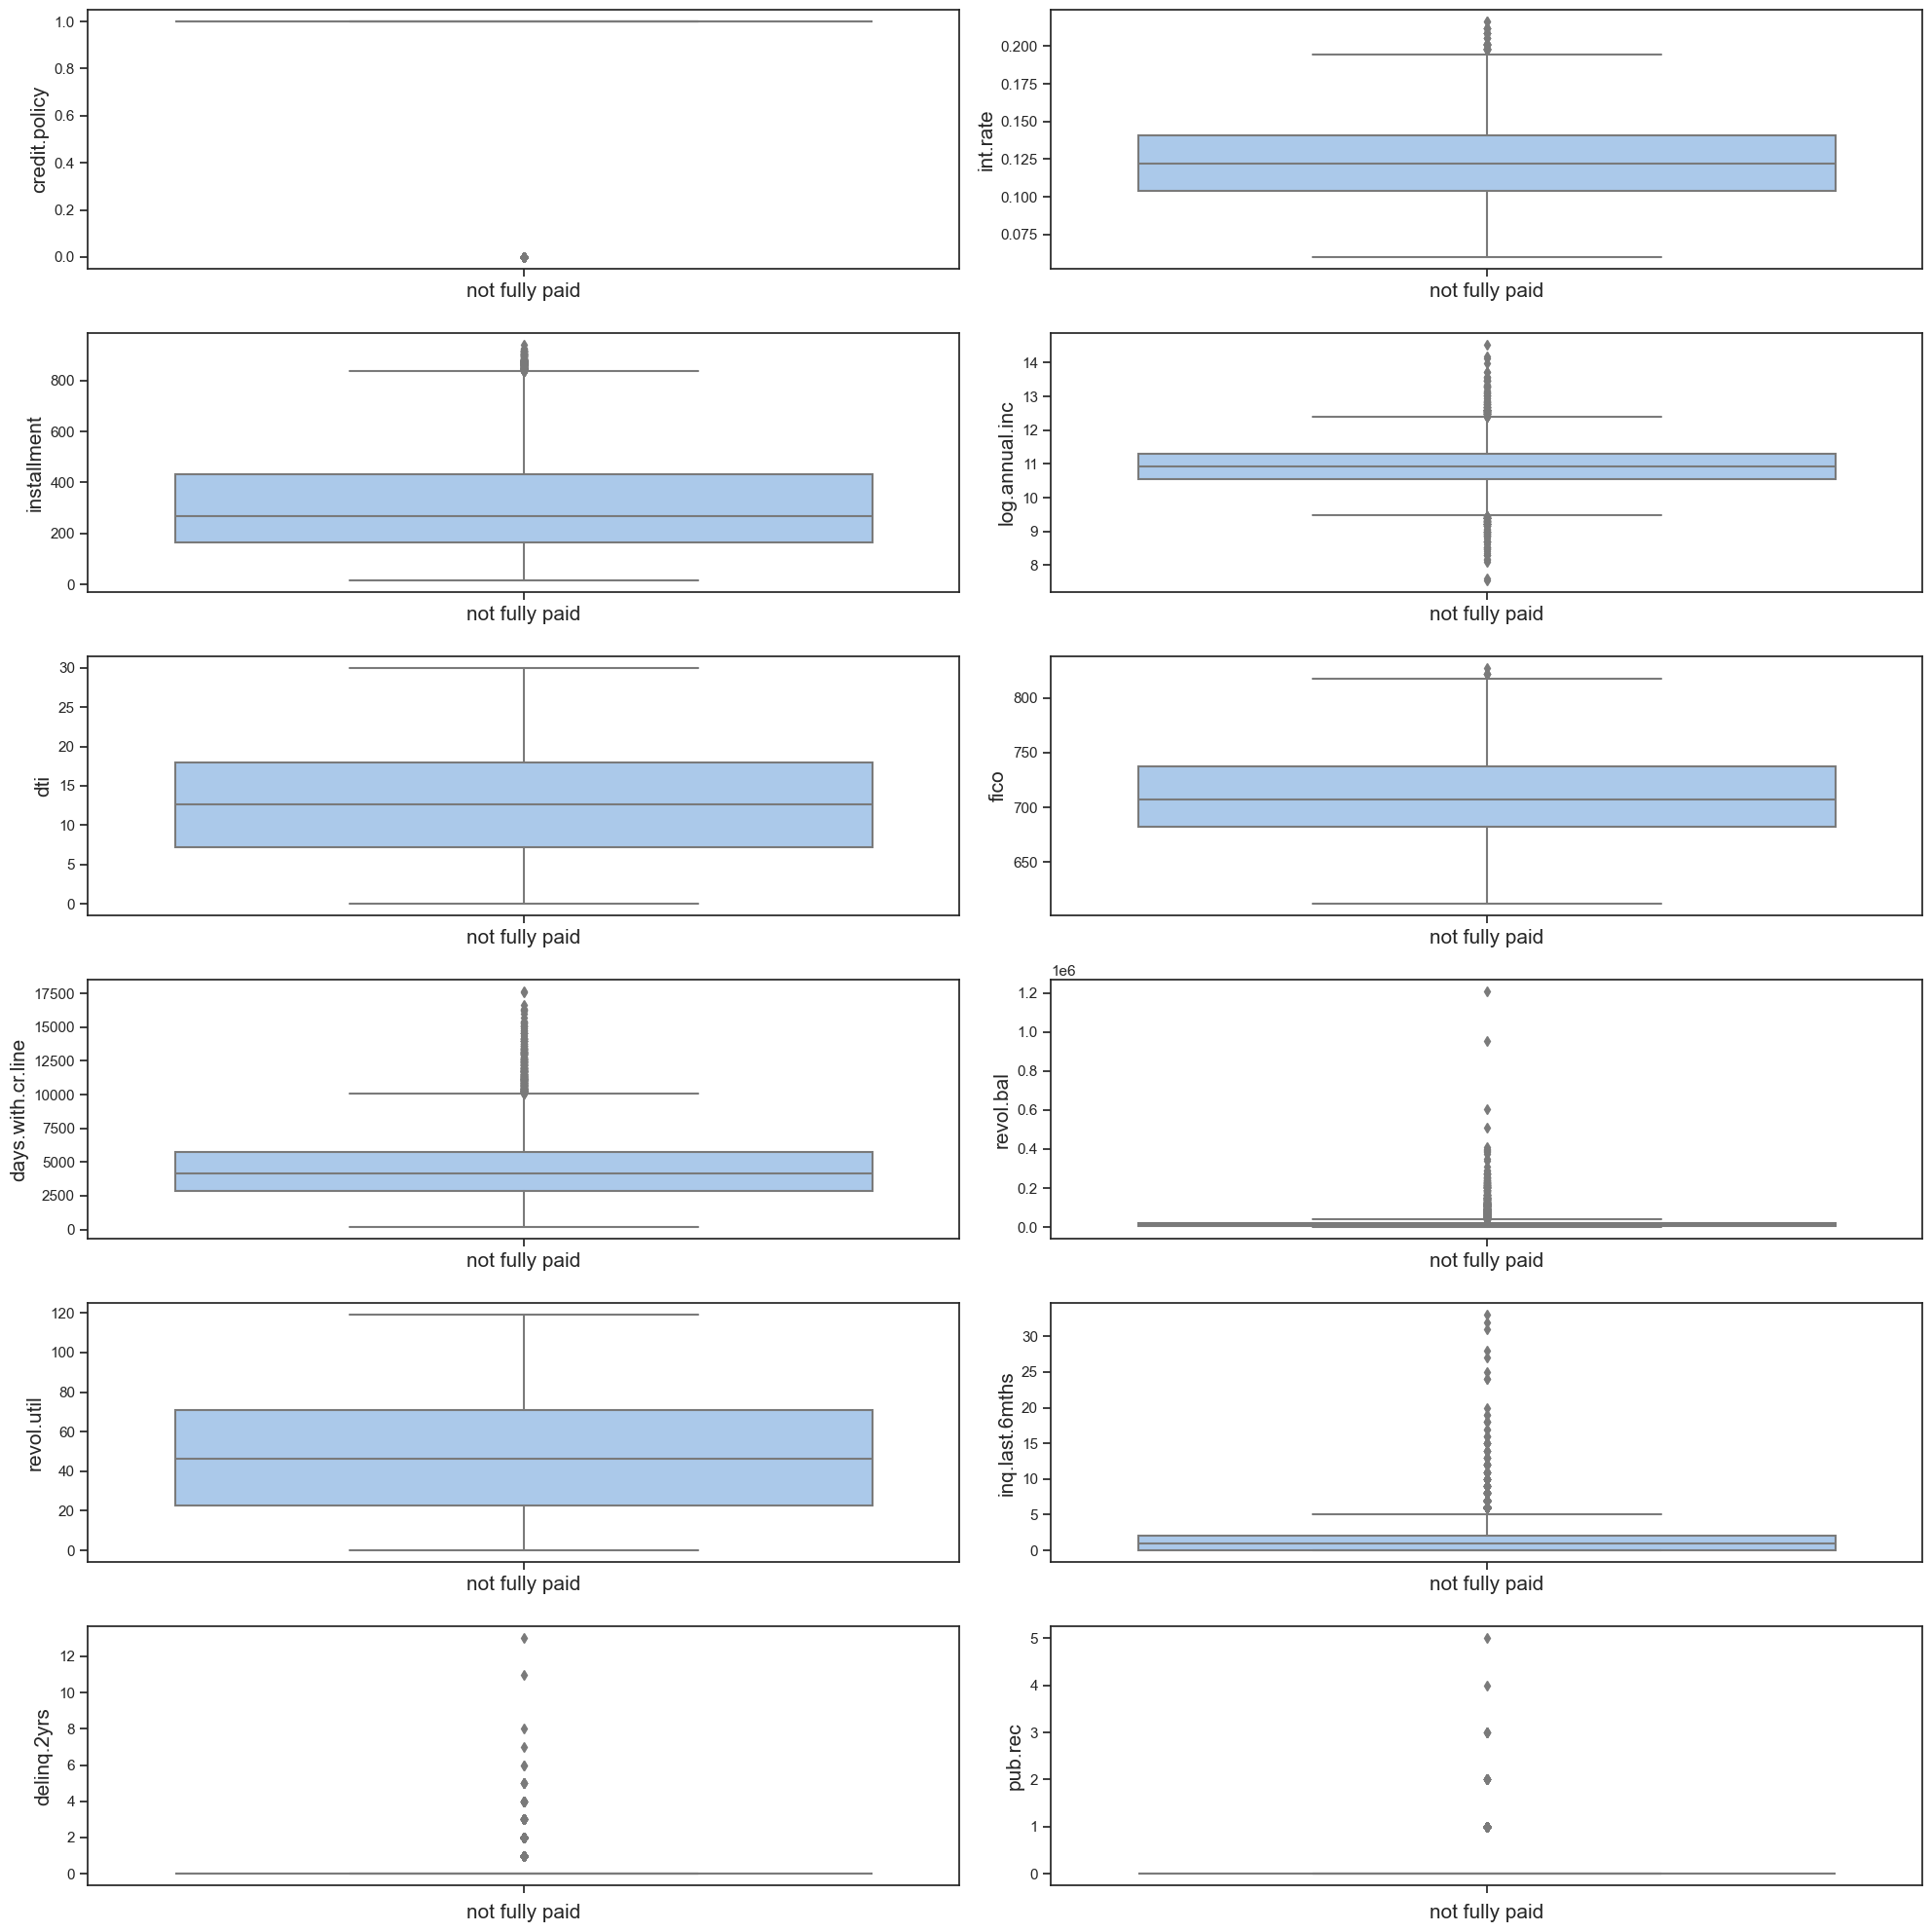

In [11]:
#Group BoxPlot for numeric features against payment status

fig, axs = plt.subplots(6,2, figsize=(20,20), sharex=True)
for ax, col in zip(axs.ravel(), numeric_features.columns):
    sns.boxplot(data=data, y=col, ax=ax)
    ax.set_xlabel("not fully paid", fontsize=15)
    ax.set_ylabel(col, fontsize=15)

plt.tight_layout()
plt.show() 

#x="not.fully.paid", y=col, hue="not.fully.paid", 

#find the log of revol_bal, deliq_2yrs, pub_rec to minimize outliers

There are outliers in almost all the variables. The variables without reasonable outliers are revol.util & installment. Revol.util however has outliers for group - 'not fully paid'; installment has outliers for the 2 classes. Dti does not have outliers when grouped across the 2 classes.<br> <br>
Due to the outliers largely seen in the dataset, scaling is required during preprocessing to fix the problem.

### Data Preprocessing

In [12]:
#Check for the dataset distribution for the independent variable - not fully paid or fully paid

distibution_check = data['not.fully.paid'].value_counts()
distibution_check

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [13]:
distibution_check[0]/(distibution_check[0] + distibution_check[1]) * 100

83.99457089162664

The dataset is grossly imbalance. 83% of the dataset has 'not fully paid status'. There is a need to balance this out before pproceeding to build the model.

In [14]:
#Balance the dataset using the upscaling method for the minority group

#Import the resample module
from sklearn.utils import resample

#Split the dataset into majority & minority
data_majority = data[data["not.fully.paid"]==0]
data_minority = data[data["not.fully.paid"]==1]

#Upsample the minority class to 8045 rows
data_minority_upsampled = resample(data_minority, replace=True, n_samples=8045, random_state=123)

#Combine majority class with upsampled minority class
data = pd.concat([data_majority, data_minority_upsampled])

data['not.fully.paid'].value_counts()

#Check for imbalance in the upsampled dataset

not.fully.paid
0    8045
1    8045
Name: count, dtype: int64

The dataset is now balanced

**2. Encoding & Scaling the Dataset**

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [16]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [17]:
#Extract the column for encoding

columns_for_encoding = list(x.select_dtypes(exclude=['float64','int64']))
print(columns_for_encoding)

['purpose']


In [18]:
#Encode the 'purpose' column using LabelEncoder

le = LabelEncoder()
for i in columns_for_encoding:
    data[i] = le.fit_transform(data[i])

In [19]:
#View the new dataset

data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [20]:
#Remove the dependent (y) variable to get the independent (x) variables needed for scaling

data_for_scaling = data.drop('not.fully.paid', axis=1)
data_for_scaling.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [21]:
#Standard the dataset using StandardScaler. It standardize the features to have 0 mean and Standard Deviation of 1
#This is because it makes the feature have similar ranges, preventing some features from dominating others 
#due to their larger magnitudes. This can improve the convergence of our models

sc = StandardScaler()
scaled_data = sc.fit_transform(data_for_scaling)

In [22]:
scaled_data[0:5]

array([[ 0.58601041, -0.01262024, -0.28899396,  2.33495315,  0.68764276,
         0.95762024,  0.84804172,  0.47137062,  0.2646003 ,  0.10803439,
        -0.75525059, -0.31214093, -0.2698196 ],
       [ 0.58601041, -0.57982617, -0.72977159, -0.4710551 ,  0.2650274 ,
         0.21139219,  0.03811376, -0.69860198,  0.38513426,  0.94789231,
        -0.75525059, -0.31214093, -0.2698196 ],
       [ 0.58601041, -0.01262024,  0.33855387,  0.17637031, -0.85136157,
        -0.17106766, -0.6368262 ,  0.09357843, -0.37593066, -0.7966906 ,
        -0.35734679, -0.31214093, -0.2698196 ],
       [ 0.58601041, -0.01262024, -0.96510203, -0.77870359,  0.68764276,
        -0.67861776,  0.17310176, -0.72299369,  0.38624633,  0.82840033,
        -0.35734679, -0.31214093, -0.2698196 ],
       [ 0.58601041, -0.57982617,  0.59629673, -1.05618497,  0.60781193,
         0.30916388, -1.04179018, -0.16804423, -0.34486833, -0.32213673,
        -0.75525059,  1.58308455, -0.2698196 ]])

In [23]:
scaled_data = pd.DataFrame(scaled_data, columns=data_for_scaling.columns)

In [24]:
scaled_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.58601,-0.012620,-0.288994,2.334953,0.687643,0.957620,0.848042,0.471371,0.264600,0.108034,-0.755251,-0.312141,-0.26982
1,0.58601,-0.579826,-0.729772,-0.471055,0.265027,0.211392,0.038114,-0.698602,0.385134,0.947892,-0.755251,-0.312141,-0.26982
2,0.58601,-0.012620,0.338554,0.176370,-0.851362,-0.171068,-0.636826,0.093578,-0.375931,-0.796691,-0.357347,-0.312141,-0.26982
3,0.58601,-0.012620,-0.965102,-0.778704,0.687643,-0.678618,0.173102,-0.722994,0.386246,0.828400,-0.357347,-0.312141,-0.26982
4,0.58601,-0.579826,0.596297,-1.056185,0.607812,0.309164,-1.041790,-0.168044,-0.344868,-0.322137,-0.755251,1.583085,-0.26982


In [25]:
#Set features and classes; features = y; classes = x

features = scaled_data

classes = data["not.fully.paid"]

**3. Split the Dataset into Test and Train**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size=0.3, random_state=20, stratify=classes)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11263, 13)
(4827, 13)
(11263,)
(4827,)


### Model 1 - Logistic Regression (LR)

In [27]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
lr_model = classifier.fit(x_train, y_train)

In [28]:
#Show Model Prediction

y_prediction = lr_model.predict(x_test)
y_prediction[0:5]

array([0, 0, 1, 0, 0])

In [29]:
#Evaluate the model

model_performance = accuracy_score(y_test, y_prediction)
model_performance

0.6302050963331262

In [30]:
#Show Coefficient and Intercept

coefficient = lr_model.coef_
intercept = lr_model.intercept_

print(coefficient)
print(intercept)

[[-0.12512595  0.12859724  0.12234677  0.21090168 -0.27245245 -0.05852424
  -0.27247368  0.02143805  0.14771808  0.06042745  0.31875639 -0.05695201
   0.04406062]]
[0.00937886]


The larger the coefficient, the higher the importance of the feature

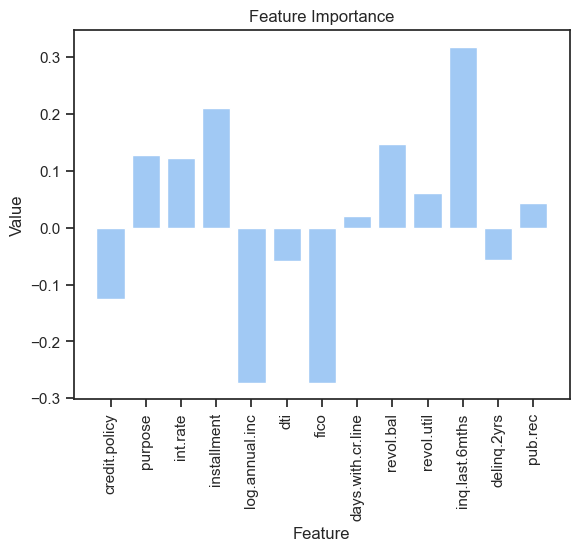

In [31]:
#Plot to see the features of importance

#Extract the column features
column_for_features = list(features)

#Get the feature importance
feature_importance = pd.DataFrame(coefficient, columns=column_for_features)

#Plot the feature importance
plt.bar(feature_importance.columns, feature_importance.iloc[0])
plt.xticks(rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Feature Importance')
plt.show()

In [32]:
#Show Confusion Matrix & Classification Report

y_target = y_test
y_output = y_prediction

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_target, y_output))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64      2413
           1       0.64      0.61      0.62      2414

    accuracy                           0.63      4827
   macro avg       0.63      0.63      0.63      4827
weighted avg       0.63      0.63      0.63      4827



Explain the classification report here

### Model 2 - Decision Tree (DT)

In [34]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [35]:
decisionTree = DecisionTreeClassifier(criterion='entropy')

In [36]:
dtc_model = decisionTree.fit(x_train, y_train)

In [37]:
#Show prediction
y_prediction = dtc_model.predict(x_test)

In [38]:
#Evaluate the model
model_performance = accuracy_score(y_test, y_prediction)
model_performance

0.9001450176092811

In [39]:
y_target = y_test
y_output = y_prediction

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_target, y_output))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2413
           1       0.84      0.99      0.91      2414

    accuracy                           0.90      4827
   macro avg       0.91      0.90      0.90      4827
weighted avg       0.91      0.90      0.90      4827



### Model 3 - Support Vector Machine (SVM) Model

In [41]:
from sklearn import svm

In [42]:
svm = svm.SVC()

In [43]:
svm_model = svm.fit(x_train, y_train)

In [44]:
y_prediction = svm_model.predict(x_test)

In [45]:
model_accuracy = accuracy_score(y_test, y_prediction)
model_accuracy

0.6799254195152269

In [46]:
y_target = y_test
y_output = y_prediction

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_target, y_output))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2413
           1       0.69      0.65      0.67      2414

    accuracy                           0.68      4827
   macro avg       0.68      0.68      0.68      4827
weighted avg       0.68      0.68      0.68      4827



### Model 4 - Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
y_prediction = gnb_model.predict(x_test)

model_accuracy = accuracy_score(y_test, y_prediction)
model_accuracy

0.6101097990470271

In [50]:
y_target = y_test
y_output = y_prediction

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_target, y_output))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66      2413
           1       0.65      0.47      0.54      2414

    accuracy                           0.61      4827
   macro avg       0.62      0.61      0.60      4827
weighted avg       0.62      0.61      0.60      4827



### Model 5 - Random Forest (RF)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
random_forest = RandomForestClassifier(criterion='gini')

In [54]:
rf_model = random_forest.fit(x_train, y_train)

In [55]:
y_prediction = rf_model.predict(x_test)

In [56]:
model_performance = accuracy_score(y_test, y_prediction)
model_performance

0.9662316138388233

In [57]:
y_target = y_test
y_output = y_prediction

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_target, y_output))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2413
           1       0.95      0.98      0.97      2414

    accuracy                           0.97      4827
   macro avg       0.97      0.97      0.97      4827
weighted avg       0.97      0.97      0.97      4827



This is the best performing model

In [59]:
#How many trees are in the forest
len(rf_model.estimators_)

100

## Inference

5 models were built using different classification model. Below are the performance of each model based on Precision & Recall;<br>

1. Logistic Regression: Group 0(Precision:0.62, Recall:0.65), Group 1(Precision:0.64, Recall:0.61)
2. Decision Tree: Group 0(Precision:0.99, Recall:0.81), Group 1(Precision:0.84, Recall:0.99)
3. Support Vector Machine (SVM): Group 0(Precision:0.67, Recall:0.71), Group 1(Precision:0.69, Recall:0.65)
4. Guassian Naive Bayes (GNB): Group 0(Precision:0.59, Recall:0.75), Group 1(Precision:0.65, Recall:0.47)
5. Random Foreest: Group 0(Precision:0.98, Recall:0.96), Group 1(Precision:0.96, Recall:0.98) **Best Model** <br>

Looking at the performance of the 5 models across the 2 groups using Precision & Accuracy, the model built with Random Forest has the best performance.

### Our Best Model

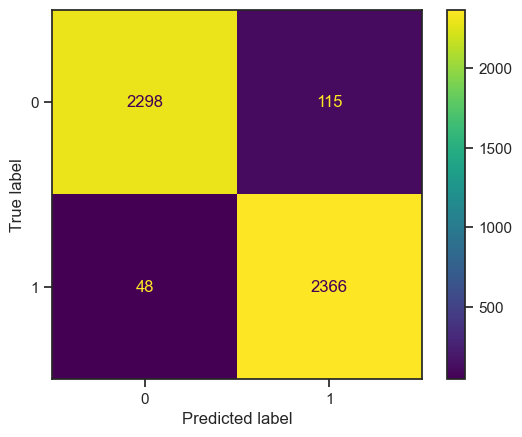

In [60]:
#View the model on a classification matix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_target, y_output)
labels = ['0', '1']
ConfusionMatrixDisplay(confusion_matrix, display_labels=labels).plot()

**Viewing our best performing model on a confusion matrix** <br>

4827 datasets were used to test the model; 2413  of which are Group 0 and 2414 are Group 1 <br>
For Group 0, 2313 were predicted correctly while 100 were predicted incorrectly <br>
For Group 1, 2366 were predicted correctly while 48 were predicted incorrectly